<a href="https://colab.research.google.com/github/strangelycutlemon/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Big5_drugs_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import drug consumption dataset
# https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#

from google.colab import files
drug_data = files.upload()

Saving drug_consumption.data to drug_consumption.data


In [2]:
import pandas as pd
import numpy as np

headers = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism-Score', 'Extraversion-Score', 'Open-Score', 'Agreeable-Score', 'Conscientious-Score', 'Impulsive-Score', 'Sensation-Seeing-Score', 'Alcohol', 'Amphetamine', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'LegalH', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']
df = pd.read_csv('drug_consumption.data', names=headers)
print(df.shape)
df.head()

(1885, 32)


,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism-Score,Extraversion-Score,Open-Score,Agreeable-Score,Conscientious-Score,Impulsive-Score,Sensation-Seeing-Score,Alcohol,Amphetamine,Amyl,Benzos,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,LegalH,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [3]:
df.describe()
'''
To-do list for cleaning this data:
1. Decode Age back into integers.
2. Decode Gender into categories.
3. 
'''

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism-Score,Extraversion-Score,Open-Score,Agreeable-Score,Conscientious-Score,Impulsive-Score,Sensation-Seeing-Score
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [0]:
drugs = ['Alcohol', 'Amphetamine', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'LegalH', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']
df1 = df.copy()

In [7]:
# Remove the first two letters of the values.

# df1['drugs'] = df1['drugs'].map(lambda x: str(x)[2:])
# This did not work.
for column in df1[drugs]:
  df1[column] = df1[column].map(lambda x: str(x)[2:])
df1[drugs].head()

,Alcohol,Amphetamine,Amyl,Benzos,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,LegalH,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
0,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0
1,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
2,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
3,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
4,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0


In [0]:
# Convert str to int
for column in df1[drugs]:
  df1[column] = df1[column].astype(str).astype(int)

# I had a lot of trouble with this.
# Problem 1: to_numeric() failed to convert my str to int. Switched to the above.
# Problem 2: I had to split up the above two lines into different cells.
#            Upon re-running the cell, map() would remove the remaining numerical characters.
# Problem 3: Once I got it working for Alcohol, I made for loops encoding all the drug columns.
#            But stripping it all made an empty Alcohol column.
#            Scratch that. It was another problem like the above. RERUN ALL CELLS


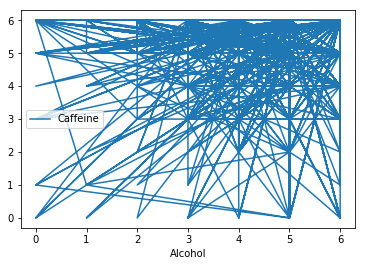

In [9]:
df1.plot(x='Alcohol',y='Caffeine')
# Wow that looks odd. But it confirms the intuition that usage of these drugs are correlated


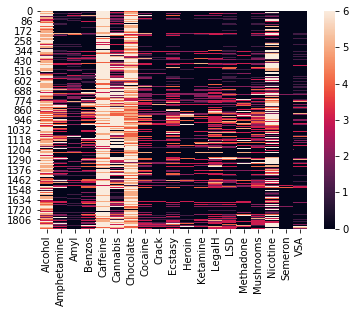

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt

heat_map = sb.heatmap(df1[drugs])
plt.show()
# This is more interesting. You see that darker columns indicate less popular drugs.
# Eventually I want to find some correlations in here between various levels of drug use.

In [0]:
# Count the people who have used each drug at least once.
user_keys = []
for key, column in df1[drugs].iteritems():
  users = 0
  for i, j in column.iteritems():
    if j > 0:
      users += 1
  user_keys.append(users)

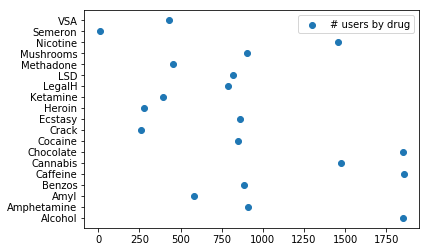

In [12]:
fig, ax = plt.subplots()
ax.scatter(user_keys, drugs, label="# users by drug")
ax.legend()

plt.show()

# Still working on getting a horizontal bar plot. Scatter() or plot() work in a pinch.

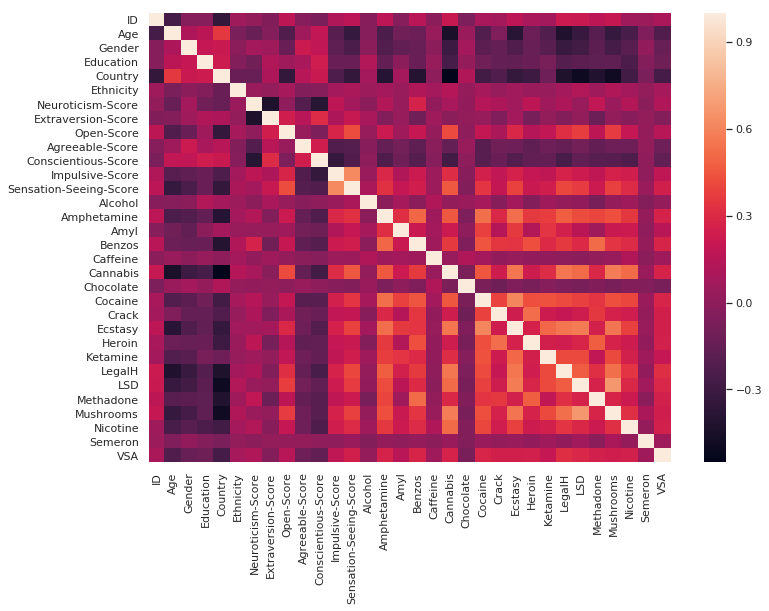

In [15]:
import seaborn as sns
%matplotlib inline

#correlation matrix
corr = df1.corr()

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr,
           xticklabels=corr.columns,
           yticklabels=corr.columns)


In [0]:
# age_bins = pd.cut(df1['Age'], 8)
# crosstab = pd.crosstab(df1, age_bins)
# print(type(crosstab))
# crosstab

# Coming back to this later.

In [32]:
# split dataframe by gender

dfs = [rows for _, rows in df1.groupby('Gender')]
male = dfs[0]
female = dfs[1]

# split dataframe by age

df_ages = [rows for _, rows in df1.groupby('Age')]
age18_24 = df_ages[0]
age25_34 = df_ages[1]
age35_44 = df_ages[2]
age45_54 = df_ages[3]
age55_64 = df_ages[4]
age65plus = df_ages[5]

# split dataframe by education

df_ed = [rows for _, rows in df1.groupby('Education')]
dropout_pre16 = df_ed[0]
dropout_16 = df_ed[1]
dropout_17 = df_ed[2]
dropout_18 = df_ed[3]
some_college = df_ed[4]
cert_diploma = df_ed[5]
uni_degree = df_ed[6]
masters_degree = df_ed[7]
doctorate_degree = df_ed[8]

# Get separate dataframes for UK and USA.
# Note: other countries are poorly represented in this dataset.

df_country = [rows for _, rows in df1.groupby('Country')]
usa = df_country[0]
uk = df_country[6]



,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism-Score,Extraversion-Score,Open-Score,Agreeable-Score,Conscientious-Score,Impulsive-Score,Sensation-Seeing-Score,Alcohol,Amphetamine,Amyl,Benzos,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,LegalH,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,5,0,0,0,6,0,4,0,0,0,0,0,0,0,0,0,0,0,0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,0.12331,-1.37983,-0.84637,6,1,0,1,6,1,6,0,0,0,0,0,0,0,0,0,6,0,0
10,11,-0.07854,0.48246,0.45468,0.96082,-0.31685,-1.05308,0.80523,-1.11902,-0.76096,1.81175,0.19268,0.07987,5,0,1,0,6,2,5,2,0,0,0,0,0,0,0,0,2,0,1
12,13,1.82213,0.48246,0.45468,0.96082,-0.31685,2.28554,0.16767,0.44585,-1.62090,-0.78155,1.29221,0.07987,5,1,0,4,6,3,5,1,0,0,0,0,0,1,1,1,6,0,0
14,15,1.82213,0.48246,-0.05921,0.96082,-0.31685,-0.92104,1.45421,0.44585,-0.60633,1.63088,1.29221,0.76540,6,0,0,0,6,0,6,0,0,0,0,0,0,0,0,0,6,0,0
